In [75]:
#la constante del grupo es el momento angular? en spines xd
#las matrices de dirac, dos son de materia y dos de antimateria y se relacionan con la propiedad de anticonmutacion

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [77]:
sigm = lambda x: 1/(1+np.exp(-x))

In [78]:
class Layer:
    #numero de neuronas NN
    #NC num de conexiones
    def __init__(self,NC,NN,ActFunc):
        
        self.NC = NC
        self.NN = NN
        self.ActFunc = ActFunc
        
        #los pesos se inicializan en random porque si concieramos los pesos la red no aprenderia
        self.W = np.random.uniform(-10,10,size=(self.NC,self.NN)) #pesos
        self.b = np.random.uniform(-10,10,size=(1,self.NN)) #bias/corte de la linea
        #dicho modelo es lineal y de pocas neuronas
        
    def Activation(self,x):
        #multiplico estimulo por el vector dada la funcion de activacion
        z = np.dot(x,self.W)+ self.b
        return self.ActFunc(z)[0]
    
    #vamos a hacer una mutacion variando pesos y bias pero con la normal y la desviacion estandar define la mutuacion
    #loc es media de la normal
    def Mutate(self):
        self.W += np.random.normal( loc=0.,scale=0.05,size=(self.NC,self.NN) )
        self.b += np.random.normal( loc=0.,scale=0.05,size=(1,self.NN) )
        
    #crear un perceptron con mas de una capa

In [79]:
L0 = Layer(2,4,sigm)
L0.W

array([[ 6.74359775,  3.80858297,  6.63701144,  3.95692263],
       [ 6.6744239 ,  9.6759579 , -8.72823797, -1.57080535]])

In [80]:
#Son de espacio r2
L0.b

array([[-4.52641081,  0.66534533, -0.06329164,  8.35029569]])

In [81]:
#con una sola capa
x = [0.1,0.5]
L0.Activation(x)

array([0.37405982, 0.9972246 , 0.0226716 , 0.99965117])

In [82]:
#si mutamos la capa la funcion de activacion cambia, y hace que cambie el comportamiento de la red, lo que hace que aprenda
L0.Mutate()
L0.Activation(x)

array([0.36154117, 0.99731773, 0.02209992, 0.99966433])

In [83]:
#con capas ocultas es deep learning, es dificil de entrenar con evolucion
#red neuronal
l0 = Layer(2,4,sigm)
l1 = Layer(4,10,sigm)
l2 = Layer(10,5,sigm)
l3 = Layer(5,2,sigm)
Layers = [l0,l1,l2,l3]

In [84]:
#se necesita el cerebro pero hara la activacion por todas las capas

def Brain(Layers,x):
    for i in range(len(Layers)):
        if i==0:
            output = Layers[i].Activation(x)
        else:
            output = Layers[i].Activation(output)
            
    return output

#cuando sale de la region muere, en el caso de los robots se devuelve
        

In [85]:
#la tarea es enchufar el cerebro en los robots d ela clase para que cuando lleguen a la frontera se devuelvan
Brain(Layers,[1,1.2])

array([0.94590738, 0.00263629])

In [86]:
#como ver el cerebro en la region y las conexiones lineales
#i es el indice de recorrer y x_ son los valores que es lo que se quiere ver
x = np.linspace(-1,1,10)
y = x.copy()

X,Y = np.meshgrid(x,y)

N1 = np.zeros_like(X)
N2 = np.zeros_like(X)

for i, _x in enumerate(x):
    for j, _y in enumerate(y):
        N1[i,j] = Brain(Layers,[_x,_y])[0]
        N2[i,j] = Brain(Layers,[_x,_y])[1]

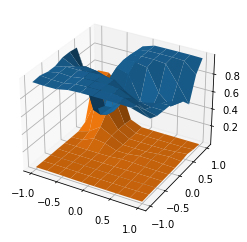

In [87]:
#para ver como cambian los robots hay que definir una funcion de aptitud/fitness
#en cada evolucion temporal, si el robot no muere su funcion de aptitud aumentara
#si el robot se bugea, tiene retraso y la aptitud disminuye con una penalidad
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(X,Y,N1)
ax.plot_surface(X,Y,N2)